In [370]:
# !pip install seaborn
#Import all the needed libraries
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
from collections import Counter, defaultdict
# from wordcloud import WordCloud

In [371]:
file_list = ('icse22_mixed_v1.json','icse22_recent_v1.json','icse2022_mixed_v1.json','icse2022_recent_v4.json')
icse_tweets = []
for path in file_list:
    with open(path) as f:
        loaded_tweets = json.load(f)
        print(f"Loaded {len(loaded_tweets)} tweets from '{path}'")
        ids = [t['id'] for t in icse_tweets]
        for t in loaded_tweets:
            if t['id'] not in ids:
                icse_tweets.append(t)
        print(f"Gathered {len(icse_tweets)} tweets")


Loaded 68 tweets from 'icse22_mixed_v1.json'
Gathered 68 tweets
Loaded 75 tweets from 'icse22_recent_v1.json'
Gathered 82 tweets
Loaded 388 tweets from 'icse2022_mixed_v1.json'
Gathered 470 tweets
Loaded 542 tweets from 'icse2022_recent_v4.json'
Gathered 642 tweets


In [372]:
def is_RT(tweet):
    if 'retweeted_status' not in tweet:
        return False      
    else:
        return True

#Create a function to see if the tweet is a reply to a tweet of another user, if so return said user. 
def is_Reply_to(tweet):
    if 'in_reply_to_screen_name' not in tweet:
        return False      
    else:
        return tweet['in_reply_to_screen_name']

In [373]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['full_text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], icse_tweets))
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], icse_tweets))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], icse_tweets))
tweets['length'] = list(map(lambda tweet: len(tweet['full_text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']), icse_tweets))
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], icse_tweets))
tweets['RT'] = list(map(is_RT, icse_tweets))
tweets['Reply'] = list(map(is_Reply_to, icse_tweets))

In [374]:
tweets.head()

,text,Username,Timestamp,length,location,RT,Reply
0,RT @ICSEconf: #ICSE22 just finished. But we ha...,heiko_braun,Thu Jun 02 11:11:32 +0000 2022,140,"Munich, Germany",True,None
1,RT @ICSEconf: #ICSE22 just finished. But we ha...,ivanmachado,Thu Jun 02 01:20:18 +0000 2022,140,"Salvador, Brazil",True,None
2,RT @ICSEconf: #ICSE22 just finished. But we ha...,jeremy_bradbury,Thu Jun 02 00:37:41 +0000 2022,140,"Toronto, Ontario, Canada",True,None
3,#ICSE22 just finished. But we have some memori...,ICSEconf,Wed Jun 01 22:02:54 +0000 2022,141,"Pittsburgh, USA",False,None
4,RT @cestlemieux: Had a great time seeing every...,ubc_spl,Wed Jun 01 17:10:49 +0000 2022,140,Vancouver 🇨🇦,True,None


In [375]:
print(f"There are {tweets['Username'].nunique()} unique users in the dataset")

There are 298 unique users in the dataset


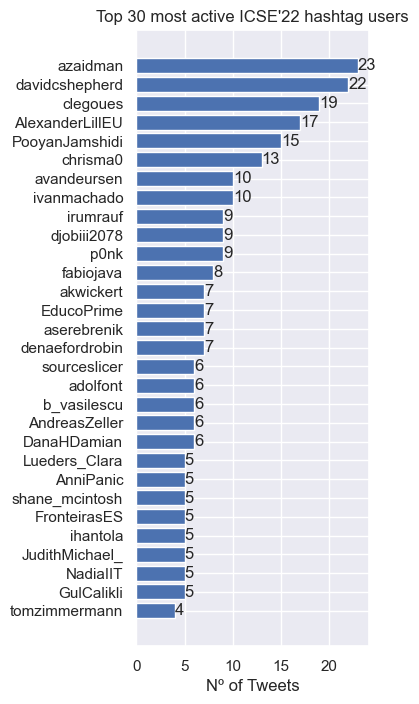

In [376]:
usertweets = tweets.groupby('Username')
#Top 30 tweeting users
top_users = usertweets.count()['text'].sort_values(ascending = False)[:20].to_dict()

fig, ax = plt.subplots(figsize = (3,8))
sns.set_theme()
y_pos = np.arange(len(top_users.keys()))
ax.barh(y_pos, top_users.values(), align='center')
ax.set_yticks(y_pos, labels=top_users.keys())
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Nº of Tweets")
ax.set_title("Top 20 most active ICSE'22 hashtag users")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()


In [377]:
#See the percentage of tweets from the initial set that are retweets
RT_tweets = tweets[tweets['RT'] == True]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(tweets)*100)}% of all the tweets")
RT_tweets.head()

The percentage of retweets is 56% of all the tweets


,text,Username,Timestamp,length,location,RT,Reply
0,RT @ICSEconf: #ICSE22 just finished. But we ha...,heiko_braun,Thu Jun 02 11:11:32 +0000 2022,140,"Munich, Germany",True,None
1,RT @ICSEconf: #ICSE22 just finished. But we ha...,ivanmachado,Thu Jun 02 01:20:18 +0000 2022,140,"Salvador, Brazil",True,None
2,RT @ICSEconf: #ICSE22 just finished. But we ha...,jeremy_bradbury,Thu Jun 02 00:37:41 +0000 2022,140,"Toronto, Ontario, Canada",True,None
4,RT @cestlemieux: Had a great time seeing every...,ubc_spl,Wed Jun 01 17:10:49 +0000 2022,140,Vancouver 🇨🇦,True,None
7,RT @SeSa_Lab: Bronze medal at the #ICSE22 SRC!...,ManuelDeStefan0,Sun May 29 17:17:40 +0000 2022,93,Cicciano,True,None


In [378]:
#See the percentage of tweets from the initial set that are replies #to tweets of another user:
Reply_tweets = tweets[tweets['Reply'].apply(type) == str]
print(f"The percentage of replies is {round(len(Reply_tweets)/len(tweets)*100)}% of all the tweets")
Reply_tweets.head()

The percentage of replies is 4% of all the tweets


,text,Username,Timestamp,length,location,RT,Reply
6,@clegoues @ICSEconf Negative here in London #i...,rchatley,Wed Jun 01 07:12:23 +0000 2022,94,London,False,clegoues
32,The first session of #ICSE22 started with grea...,akwickert,Fri May 27 14:18:38 +0000 2022,201,"Darmstadt, Deutschland",False,akwickert
33,Some notes about ML related papers presented o...,akwickert,Fri May 27 14:14:41 +0000 2022,95,"Darmstadt, Deutschland",False,akwickert
36,Here is the link for the paper (Journal First ...,GulCalikli,Fri May 27 14:08:41 +0000 2022,87,"Glasgow, United Kingdom",False,GulCalikli
62,@FoelliXde presents their paper TaintBench at...,akwickert,Thu May 26 15:16:41 +0000 2022,232,"Darmstadt, Deutschland",False,FoelliXde


In [379]:
#Percentage of tweets from the initial set that have mentions and are not retweets:
mention_tweets = tweets[~tweets['text'].str.contains("RT") & tweets['text'].str.contains("@")]
print(f"The percentage of mentions is {round(len(mention_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of mentions is 28% of all the tweets


In [380]:
#Tweets that are plain text tweets (No RT or mention)
plain_text_tweets = tweets[~tweets['text'].str.contains("@")  & ~tweets['text'].str.contains("RT")]
print(f"The percentage of plain text tweets is {round(len(plain_text_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of plain text tweets is 16% of all the tweets


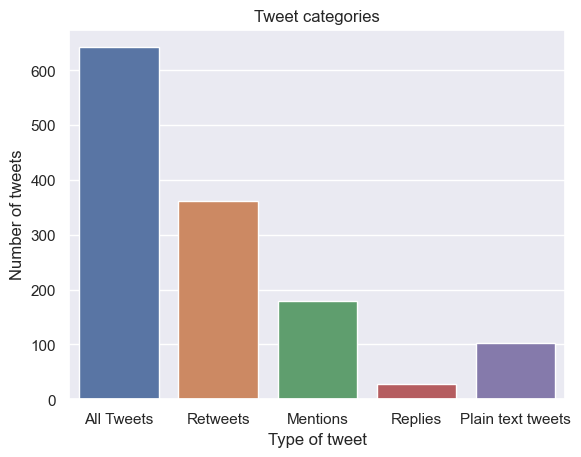

In [381]:
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list = [len(tweets), len(RT_tweets),len(mention_tweets), len(Reply_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Replies', 'Plain text tweets']
plt.figure()
sns.set_theme()
plt.title('Tweet categories')
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x=item_list, y=len_list)

plt.show()

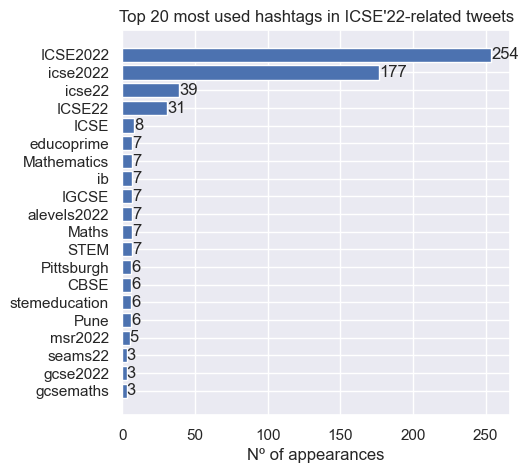

In [382]:
hashtags = Counter()
for tweet in icse_tweets:
    if ht_list := tweet['entities']['hashtags']:
        for ht_element in ht_list:
            hashtags.update({ht_element['text']: 1})
most_common = hashtags.most_common(20)

fig, ax = plt.subplots(figsize = (5,5))
y_pos = np.arange(len(most_common))
ax.barh(y_pos, [e[1] for e in most_common], align='center')
ax.set_yticks(y_pos, labels=[e[0] for e in most_common])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Nº of appearances")
ax.set_title("Top 20 most used hashtags in ICSE'22-related tweets")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()


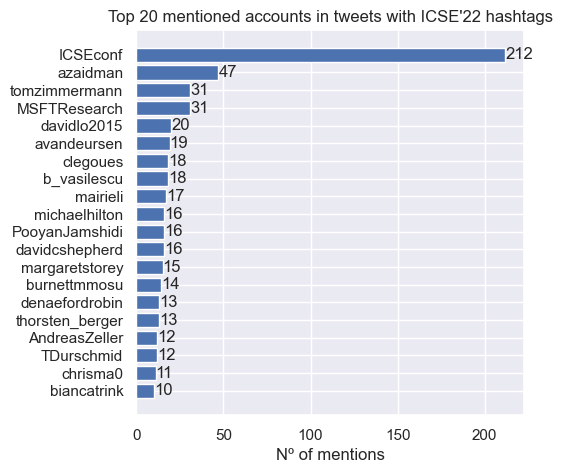

In [383]:
user_mentions = Counter()
for tweet in icse_tweets:
    if m_list := tweet['entities']['user_mentions']:
        for m_element in m_list:
            user_mentions.update({m_element['screen_name']: 1})
most_common = user_mentions.most_common(20)

fig, ax = plt.subplots(figsize = (5,5))
sns.set_theme()
y_pos = np.arange(len(most_common))
ax.barh(y_pos, [e[1] for e in most_common], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels([e[0] for e in most_common])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Nº of mentions")
ax.set_title("Top 20 mentioned accounts in tweets with ICSE'22 hashtags")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()